In [1]:
%%time

# import libraries used in this project 

import os
import fnmatch

import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

# configure matplot to not warn on large data set 
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline

CPU times: user 1.16 s, sys: 302 ms, total: 1.46 s
Wall time: 1.59 s


In [2]:
%%time

#
# method to get zero_crossing, sepctral_centroid, spectral_rolloff, and chroma_stft features from .wav files
#
def getDataFrame(inputFolders,dataFrameColumns,heartbeatclassifier):
    inputList=[]
    counter=0
    for inputFolder in inputFolders:
        for soundType in heartbeatclassifier:
            filesOfCategory=fnmatch.filter(os.listdir("./data/"+inputFolder+"/"),soundType+"*.wav")
            for file in filesOfCategory:
                x,sr=librosa.load("./data/"+inputFolder+"/"+file,duration=5,res_type='kaiser_fast')
                inputList.append([np.mean(x) for x in librosa.feature.mfcc(x,sr=sr)])
                inputList[counter].append(sum(librosa.zero_crossings(x)))
                inputList[counter].append(np.mean(librosa.feature.spectral_centroid(x)))
                inputList[counter].append(np.mean(librosa.feature.spectral_rolloff(x,sr=sr)))
                inputList[counter].append(np.mean(librosa.feature.chroma_stft(x,sr=sr)))
                inputList[counter].append(soundType)
                counter+=1
    return pd.DataFrame(inputList,columns=dataFrameColumns)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.05 µs


In [3]:
%%time

# music_folders=["set_a"]
music_folders=["set_a","set_b"]

# label frequency and librosa feature column headers
inputColums1=["Freq"+str(i) for i in range(20)]
inputColums2=["zero","centroid","rolloff","chromagram","outputbeatclassifier"]
inputColums1.extend(inputColums2)

# label output classifiers
outputClassifier=["normal","artifact","murmur","extrahls"]

# process data
dataframe=getDataFrame(music_folders,inputColums1,outputClassifier)

# save data frame to csv
dataframe.to_csv(r'music_dataframe.csv', index = False)

/Users/vijit/opt/anaconda3/lib/python3.8/site-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


CPU times: user 14min 53s, sys: 17.7 s, total: 15min 11s
Wall time: 2min 18s


In [4]:
%%time

# print data frame
dataframe.head()

CPU times: user 1.12 ms, sys: 66 µs, total: 1.18 ms
Wall time: 160 µs


,Freq0,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,...,Freq15,Freq16,Freq17,Freq18,Freq19,zero,centroid,rolloff,chromagram,outputbeatclassifier
0,-489.621796,70.239189,61.142830,48.898048,36.555328,26.469486,19.623278,15.663741,13.472218,11.869776,...,2.056817,2.049077,2.306891,2.535395,2.566249,605,157.260560,208.852132,0.743970,normal
1,-406.428528,153.238861,-1.369525,16.263828,10.937109,16.939487,4.494656,6.633343,6.228123,3.696192,...,-2.767086,-3.141026,-3.952870,-3.527147,-4.081270,7624,1046.537575,1888.940430,0.663114,normal
2,-511.582214,82.091522,6.478385,35.782322,4.926917,23.501289,2.172138,16.772097,-0.364136,12.615508,...,4.534374,-2.864163,2.395745,-2.710135,1.320220,22103,2243.817234,4613.987223,0.754454,normal
3,-514.132935,78.292191,65.463066,49.305317,34.505836,23.954039,18.073490,15.343872,13.722631,11.918728,...,1.235011,1.578198,2.168477,2.570371,2.564390,660,167.595804,213.587443,0.703607,normal
4,-371.671722,155.286530,35.827465,19.501045,37.935871,34.704395,17.897236,9.181622,10.555705,10.437612,...,-3.627311,-3.266012,0.071095,0.160198,-1.439477,1834,513.218302,749.435967,0.634785,normal


In [5]:
%%time

# statistically describe librosa features
columnsToDescribe=["zero","centroid","rolloff","chromagram"]
dataframe[columnsToDescribe].describe()

CPU times: user 99.4 ms, sys: 5.61 ms, total: 105 ms
Wall time: 13.2 ms


,zero,centroid,rolloff,chromagram
count,539.000000,539.000000,539.000000,539.000000
mean,4286.894249,618.561566,1208.803925,0.661149
std,9063.343336,870.365388,1504.116326,0.081917
min,161.000000,101.834424,74.468994,0.115923
25%,960.500000,267.172097,546.951963,0.640450
50%,1558.000000,329.344657,681.509809,0.680350
75%,2647.500000,430.553676,874.944848,0.707019
max,75315.000000,6769.973347,8923.169963,0.806292


In [6]:
%%time

# statistically describe frequencies
freqColums=["Freq"+str(i) for i in range(20)]
dataframe[freqColums].describe()

CPU times: user 301 ms, sys: 17.4 ms, total: 319 ms
Wall time: 40.9 ms


,Freq0,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,Freq10,Freq11,Freq12,Freq13,Freq14,Freq15,Freq16,Freq17,Freq18,Freq19
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,-406.045462,169.288606,53.323498,-1.084115,1.276139,26.889087,19.883785,2.657310,-3.351093,10.569057,12.805894,4.211871,-5.028657,0.621873,5.684094,4.151072,-2.303274,-0.733562,3.428893,4.031937
std,96.656671,50.163977,27.165184,23.925762,13.106193,9.859723,12.877723,9.368896,8.476874,6.422815,10.446832,4.832663,4.642851,3.490314,6.504519,3.803879,4.338677,3.955479,4.882095,3.620167
min,-1081.043335,-29.527250,-72.262596,-53.103825,-28.883732,-31.063078,-44.440163,-43.664692,-49.969437,-38.816525,-31.041985,-35.024479,-22.014156,-18.243839,-20.437279,-14.023951,-13.795611,-25.276119,-16.287870,-11.521476
25%,-446.447266,154.142403,51.089611,-17.432729,-5.743252,22.367726,18.751729,-1.932964,-7.997710,8.170370,12.157995,2.099072,-7.785314,-1.340909,4.659462,2.821086,-4.629939,-2.253933,2.464606,2.944626
50%,-403.137756,178.680283,62.443062,-3.918440,-0.049698,27.606680,23.784496,2.561381,-3.031707,11.370013,16.101429,5.065814,-5.178867,0.421793,7.575893,5.009160,-2.207715,-0.998493,4.589147,4.891876
75%,-363.788162,200.125778,68.689850,9.829993,5.678255,32.710878,27.464014,7.885830,0.961425,13.977825,18.829214,7.062870,-2.826142,1.951452,9.452503,6.367694,-0.179014,0.251062,5.895007,6.143464
max,130.121475,271.676331,91.316147,62.930393,48.075516,50.836891,48.271702,38.122517,20.969564,24.214865,27.890099,23.331343,23.732828,29.896132,43.768089,27.439344,47.039963,50.584553,39.139015,32.866734


CPU times: user 811 ms, sys: 19.8 ms, total: 831 ms
Wall time: 616 ms


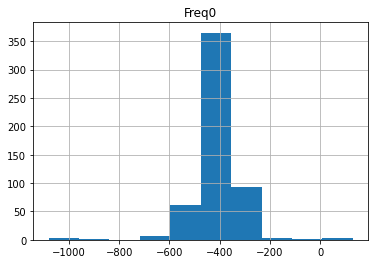

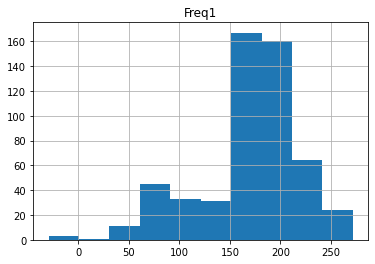

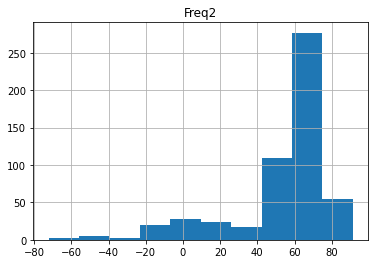

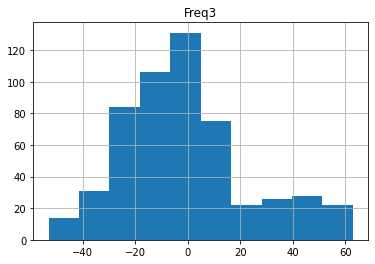

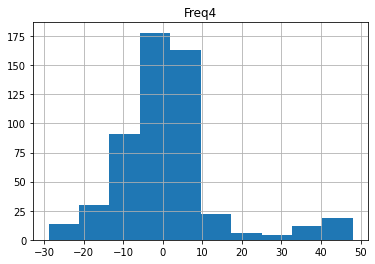

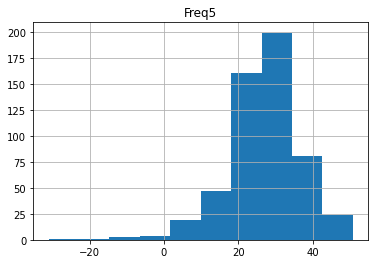

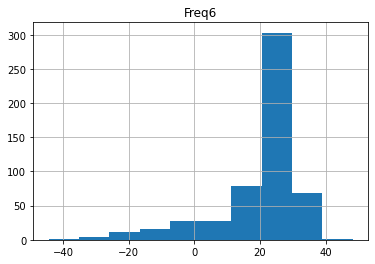

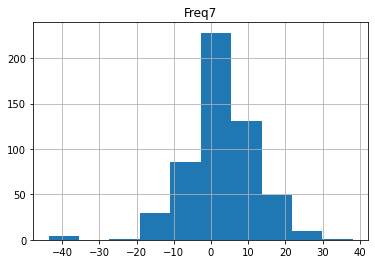

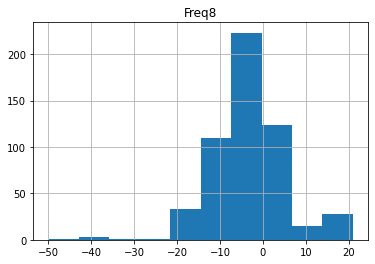

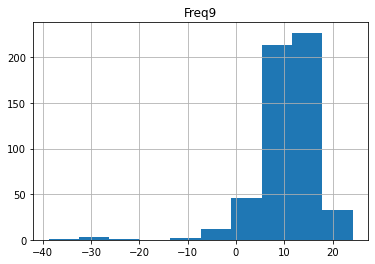

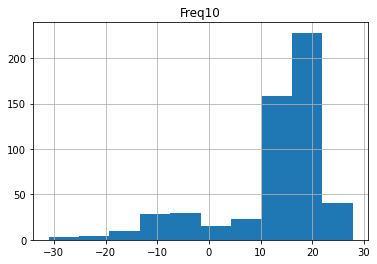

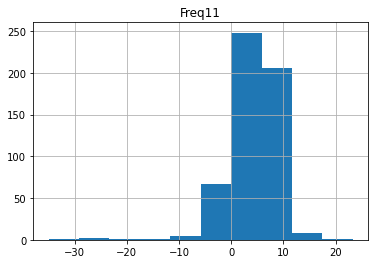

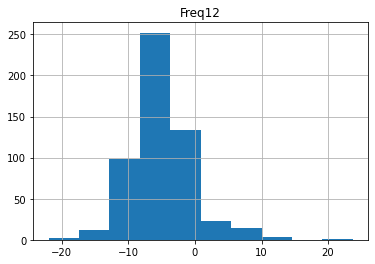

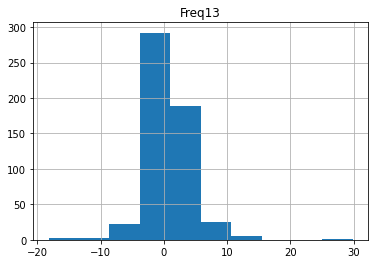

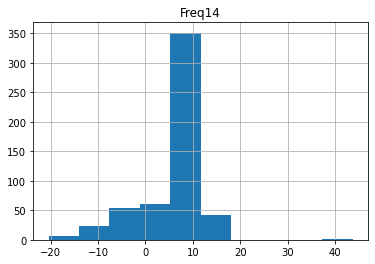

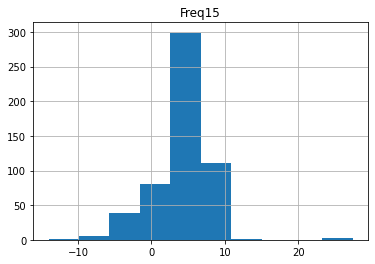

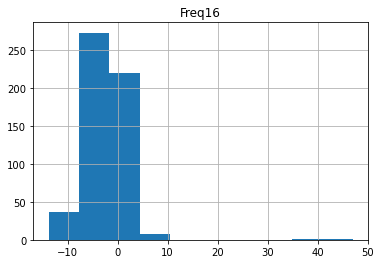

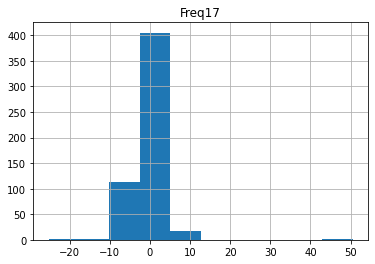

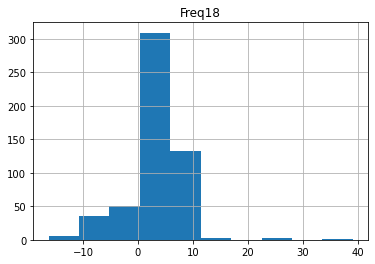

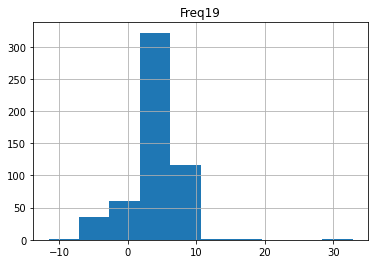

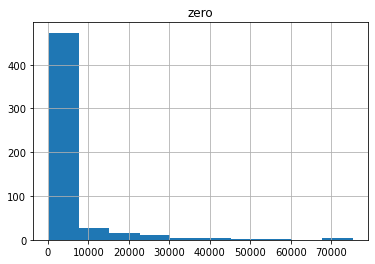

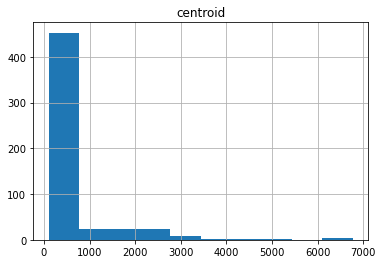

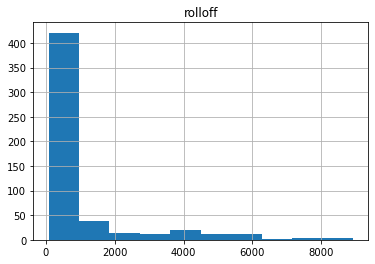

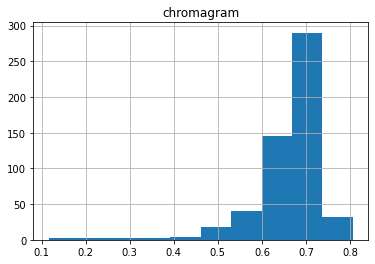

In [7]:
%%time

# graph data frame 
columnsToRemove=["filename","outputbeatclassifier"]
for col in dataframe.columns:
    if(col not in columnsToRemove):
        dataframe.hist(column=col)

CPU times: user 82.3 ms, sys: 8.84 ms, total: 91.1 ms
Wall time: 89.5 ms


<AxesSubplot:>

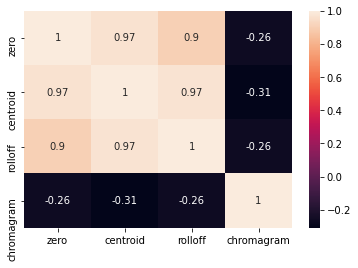

In [8]:
%%time

# graph heat map for dataframe
inputColumns= dataframe.iloc[:,20:]
correlation_mat = inputColumns.corr()
sns.heatmap(correlation_mat, annot = True)

In [9]:
%%time

# classification of each file in dataframe
x=dataframe.iloc[:, 0]
y=dataframe.iloc[:,-1]
y
# correlation= np.corrcoef(x,y)
# print(correlation)

CPU times: user 221 µs, sys: 1 µs, total: 222 µs
Wall time: 226 µs


0      normal
1      normal
2      normal
3      normal
4      normal
        ...  
534    murmur
535    murmur
536    murmur
537    murmur
538    murmur
Name: outputbeatclassifier, Length: 539, dtype: object